### Here we take database from IDU and preprocess for our format

##### Start from 3 files:
- "city_name_sex-age-year.geojson"
- "workplaces_city_name.xlsx"
- "schools_city_name.xlsx"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon, MultiPolygon

In [2]:
city_name = 'chelyabinsk'
geo_df = gpd.read_file('../data/initial_' + city_name + '/' + city_name + '-sex-age.geojson')

In [3]:
geo_df_processed = geo_df.drop(columns=['year', 'scenario'])
geo_df_processed.head()

,building_id,men_0,men_1,men_2,men_3,men_4,men_5,men_6,men_7,men_8,...,women_92,women_93,women_94,women_95,women_96,women_97,women_98,women_99,women_100,geometry
0,1093349,1,1,1,0,1,0,3,0,1,...,0,0,0,0,0,0,0,0,0,POINT (61.36745 55.16020)
1,1093350,1,0,2,1,1,1,2,1,2,...,0,0,0,0,0,0,0,0,0,POINT (61.36625 55.15999)
2,1093351,1,1,0,0,0,1,2,1,1,...,0,0,0,0,0,0,0,0,0,POINT (61.36560 55.16086)
3,1093352,0,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,POINT (61.37295 55.16050)
4,1093353,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,POINT (61.37503 55.16056)


In [4]:
dict_rename = dict()
for age in range(101):
    dict_rename['men_' + str(age)] = 'm' + str(age)
    dict_rename['women_' + str(age)] = 'g' + str(age)

geo_df_processed = geo_df_processed.rename(columns=dict_rename)

def assign_latitude(row):
    return row['geometry'].coords[0][1]

def assign_longitude(row):
    return row['geometry'].coords[0][0]

geo_df_processed['latitude'] = geo_df_processed.apply(assign_latitude, axis=1)
geo_df_processed['longitude'] = geo_df_processed.apply(assign_longitude, axis=1)

In [5]:
geo_df_processed.head()

,building_id,m0,m1,m2,m3,m4,m5,m6,m7,m8,...,g94,g95,g96,g97,g98,g99,g100,geometry,latitude,longitude
0,1093349,1,1,1,0,1,0,3,0,1,...,0,0,0,0,0,0,0,POINT (61.36745 55.16020),55.160201,61.367451
1,1093350,1,0,2,1,1,1,2,1,2,...,0,0,0,0,0,0,0,POINT (61.36625 55.15999),55.159989,61.366245
2,1093351,1,1,0,0,0,1,2,1,1,...,0,0,0,0,0,0,0,POINT (61.36560 55.16086),55.160865,61.365599
3,1093352,0,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,POINT (61.37295 55.16050),55.160495,61.372953
4,1093353,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,POINT (61.37503 55.16056),55.160564,61.375029


In [6]:
geo_df_processed.to_excel('../data/initial_' + city_name + '/database_main_' + city_name +'.xlsx')

In [7]:
MO = gpd.read_file('../data/initial_' + city_name + '/' + city_name + '_districts.geojson')
schools = pd.read_excel('../data/initial_'  + city_name + '/schools_'  + city_name + '.xlsx')

(61.120445185, 61.629756515, 54.97449694, 55.337482859999994)

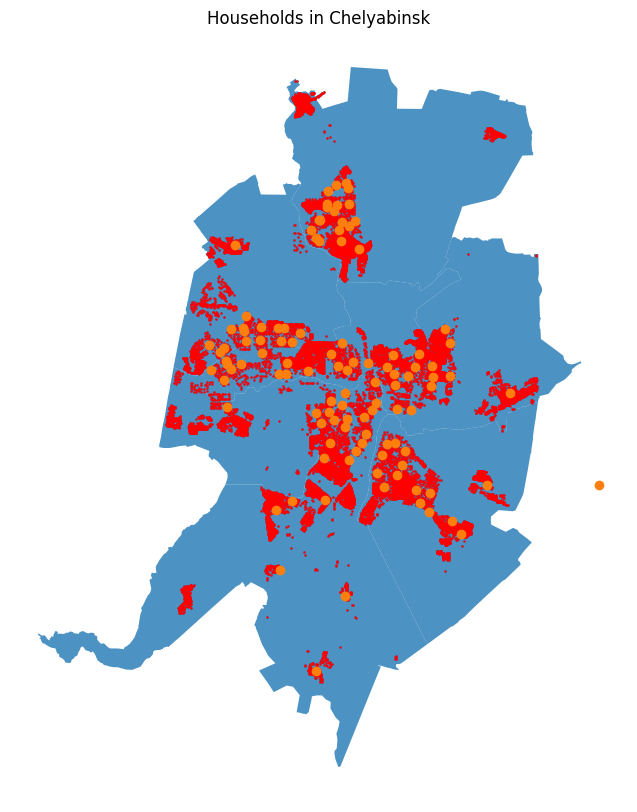

In [8]:
import geodatasets
import contextily as cx

fig, ax = plt.subplots(figsize=(10,10))
fig.subplots_adjust(hspace=0.0, wspace=0.0)
ax.set_title('Households in '+city_name[0].upper()+city_name[1:].lower())

geo_df = geo_df.to_crs(epsg=4326)
MO = MO.to_crs(epsg=4326)
geo_df_processed = geo_df_processed.to_crs(epsg=4326)
MO.plot(ax=ax, alpha = 0.8)
geo_df.plot(ax=ax, markersize=0.5)
geo_df_processed.plot(ax=ax, color='r', markersize=0.5)
# cx.add_basemap(ax, crs=MO.crs)
ax.scatter(schools['Долгота'], schools['Широта'])
ax.axis("off")

In [9]:
### FOR SPB
# city_name = 'spb'
# work_polys = gpd.read_file('../data/initial_' + city_name + '/work_polys.geojson')
# poly = work_polys.iloc[0].geometry
# xx, yy = poly.exterior.coords.xy
# work_polys.plot

In [10]:
# workplaces_data = pd.DataFrame(columns=['name', 'cookies_matched_quantity', 'polygons.points.latitude', 'polygons.points.longitude'])
# for i in range(len(work_polys)):
#     poly = work_polys.iloc[i].geometry
#     xx, yy = poly.exterior.coords.xy 
#     num_of_vertex_in_polygon = 7
#     current_wp = work_polys.iloc[i]
#     for j in range(num_of_vertex_in_polygon):
#         row = [current_wp['name'], current_wp['audience_count'], yy[j], xx[j]]
#         workplaces_data.loc[len(workplaces_data)] = row
#
# workplaces_data.to_excel('../data/initial_' + city_name + '/workplaces_' + city_name + '.xlsx', index=False)
# plt.scatter(workplaces_data['polygons.points.latitude'], workplaces_data['polygons.points.longitude'])